# TP01 - Projeto de Bloco

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

## 1. Carregamento de Dados

Vamos carregar o dataset e identificar as features e o target.

In [2]:
df = pd.read_csv('heart.csv')
print(f"Shape do dataset: {df.shape}")
print(f"\nPrimeiras 5 linhas:")
df.head()

Shape do dataset: (918, 12)

Primeiras 5 linhas:


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
print("Colunas do dataset:")
print(df.columns.tolist())
print(f"\nTarget: HeartDisease - indica se o paciente tem doença cardíaca (1) ou não (0)")
print(f"Features: todas as outras {len(df.columns)-1} colunas")

Colunas do dataset:
['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'HeartDisease']

Target: HeartDisease - indica se o paciente tem doença cardíaca (1) ou não (0)
Features: todas as outras 11 colunas


## 2. Divisão de Dados

Separando os dados em 80% para treino e 20% para validação.

In [4]:
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Tamanho do conjunto de treino: {X_train.shape[0]} amostras")
print(f"Tamanho do conjunto de validação: {X_val.shape[0]} amostras")
print(f"Proporção: {X_train.shape[0]/len(df)*100:.1f}% treino / {X_val.shape[0]/len(df)*100:.1f}% validação")

Tamanho do conjunto de treino: 734 amostras
Tamanho do conjunto de validação: 184 amostras
Proporção: 80.0% treino / 20.0% validação


## 3. Transformação de Dados

Vamos padronizar as features numéricas e codificar as categóricas.

In [5]:
categorical_cols = X_train.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

print(f"Colunas categóricas: {categorical_cols}")
print(f"Colunas numéricas: {numerical_cols[:5]} ... (total: {len(numerical_cols)})")

Colunas categóricas: ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
Colunas numéricas: ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR'] ... (total: 6)


In [6]:
X_train_encoded = pd.get_dummies(X_train, columns=categorical_cols, drop_first=True)
X_val_encoded = pd.get_dummies(X_val, columns=categorical_cols, drop_first=True)

X_val_encoded = X_val_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_val_scaled = scaler.transform(X_val_encoded)

print(f"Shape após transformação - Treino: {X_train_scaled.shape}")
print(f"Shape após transformação - Validação: {X_val_scaled.shape}")

Shape após transformação - Treino: (734, 15)
Shape após transformação - Validação: (184, 15)


## 4. Modelagem K-Nearest Neighbors (KNN)

Implementando o algoritmo KNN com k=5 inicialmente.

In [7]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_val_scaled)
print("Modelo KNN treinado com k=5")

Modelo KNN treinado com k=5


## 5. Avaliação do Modelo

Calculando a acurácia do modelo nos dados de validação.

In [8]:
accuracy = accuracy_score(y_val, y_pred)
print(f"Acurácia do modelo KNN (k=5): {accuracy:.4f}")
print(f"Isso significa que o modelo acertou {accuracy*100:.2f}% das previsões no conjunto de validação")

Acurácia do modelo KNN (k=5): 0.8533
Isso significa que o modelo acertou 85.33% das previsões no conjunto de validação


## 6. Análise de Parâmetros

Testando diferentes valores de K para encontrar o melhor resultado.

In [9]:
k_values = range(1, 31)
accuracies = []

for k in k_values:
    knn_temp = KNeighborsClassifier(n_neighbors=k)
    knn_temp.fit(X_train_scaled, y_train)
    y_pred_temp = knn_temp.predict(X_val_scaled)
    acc = accuracy_score(y_val, y_pred_temp)
    accuracies.append(acc)
    
best_k = k_values[accuracies.index(max(accuracies))]
best_accuracy = max(accuracies)

print(f"Melhor valor de K: {best_k}")
print(f"Melhor acurácia: {best_accuracy:.4f}")

Melhor valor de K: 23
Melhor acurácia: 0.9022


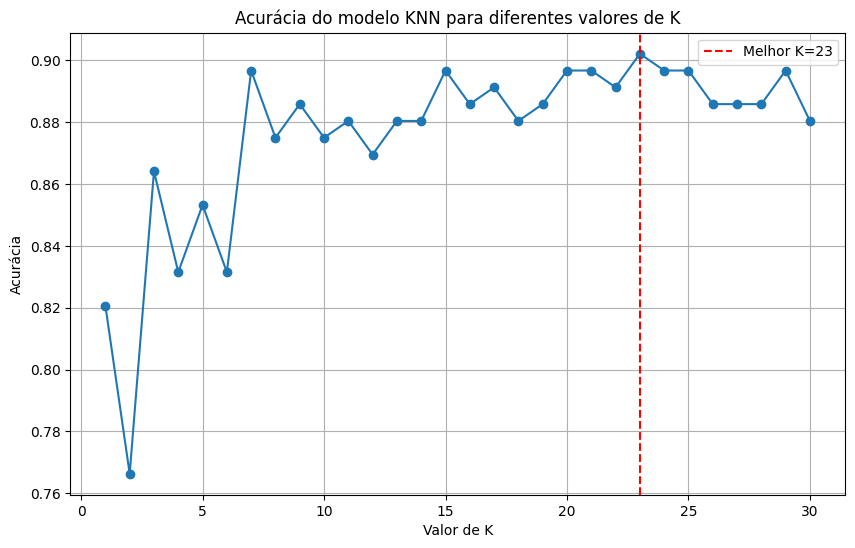

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o')
plt.xlabel('Valor de K')
plt.ylabel('Acurácia')
plt.title('Acurácia do modelo KNN para diferentes valores de K')
plt.grid(True)
plt.axvline(x=best_k, color='r', linestyle='--', label=f'Melhor K={best_k}')
plt.legend()
plt.show()

## Conclusões

A análise mostrou que o valor de K tem um impacto significativo na performance do modelo KNN. Valores muito baixos de K podem causar overfitting, enquanto valores muito altos podem resultar em underfitting. O gráfico acima ajuda a identificar o valor ótimo de K que maximiza a acurácia nos dados de validação.